<a href="https://colab.research.google.com/github/jyang500/cmsc/blob/main/parseCaptcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!unzip "/content/drive/MyDrive/Colab Notebooks/captcha.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/captcha.zip
replace Train/01se.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Train/01se.png          
  inflating: Train/03a1.png          
  inflating: Train/04r5.png          
  inflating: Train/05m4.png          
  inflating: Train/0b3b.png          
  inflating: Train/0gvf.png          
  inflating: Train/0iuj.png          
  inflating: Train/0k59.png          
  inflating: Train/0lbv.png          
  inflating: Train/0tx7.png          
  inflating: Train/0uai.png          
  inflating: Train/0wlz.png          
  inflating: Train/0ws3.png          
  inflating: Train/124a.png          
  inflating: Train/12t1.png          
  inflating: Train/12y1.png          
  inflating: Train/18si.png          
  inflating: Train/1dhy.png          
  inflating: Train/1g53.png          
  inflating: Train/1hnq.png          
  inflating: Train/1j08.png          
  inflating: Train/1lhn.png          
  inflating: Train/1odm.png          
 

In [98]:
# file combination code modified from dataset page on kaggle
# https://www.kaggle.com/famadio/ocr-attempt-keras-open-cv
dir = "kaggle"
train_data = []

for i in os.listdir(dir):
    count = 0
    sub_directory = os.path.join(dir,i)
    
    for j in os.listdir(sub_directory):
        count+=1
        if count > 80:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        #img = np.resize(img,(50,200,1))
        train_data.append([img,i])

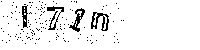

In [112]:
from google.colab.patches import cv2_imshow
cv2_imshow( train_data[20][0],)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [104]:
len(train_data)

426

In [105]:
print(train_data[1])

[array([[192, 192, 192, ..., 192, 192, 192],
       [192, 244, 244, ..., 246, 246, 192],
       [192, 244, 244, ..., 246, 205, 192],
       ...,
       [192, 244, 244, ..., 246, 246, 192],
       [192, 244, 244, ..., 246, 246, 192],
       [192, 192, 192, ..., 192, 192, 192]], dtype=uint8), 'test']


In [106]:
fileName = "captchatrainSmall.npy"
if os.path.exists(fileName):
    os.remove(fileName)
with open(fileName, "wb") as f:
    np.save(f, train_data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


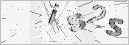

In [110]:
from google.colab.patches import cv2_imshow
with open(fileName, "rb") as f:
    test = np.load(f, allow_pickle=True)
cv2_imshow(test[0][0])
cv2.waitKey(0)
cv2.destroyAllWindows()